<a href="https://colab.research.google.com/github/AndresMontesDeOca/Redes_Neuronales/blob/main/05_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiperceptrón - Entrenamiento y Métricas
---
**Montar la carpeta de Google Drive y definir constantes para trabajar**

In [31]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/Redes_Neuronales/Fuentes/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/Redes_Neuronales/Data/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

################################################################
def plot_history(history, start_epoch=0, metrics=None):
    if isinstance(metrics, str):
        metrics = [metrics]

    if metrics is None:
        metrics = [x for x in history.history.keys() if x[:4] != 'val_']

    if len(metrics) == 0:
        print('No metrics to display.')
        return

    # Get the epochs and filter them starting from start_epoch
    x = history.epoch[start_epoch:]

    rows = 1
    cols = len(metrics)
    count = 0

    plt.figure(figsize=(12 * cols, 8))

    for metric in sorted(metrics):
        count += 1
        plt.subplot(rows, cols, count)
        plt.plot(x, history.history[metric][start_epoch:], label='Train')
        val_metric = f'val_{metric}'
        if val_metric in history.history.keys():
            plt.plot(x, history.history[val_metric][start_epoch:], label='Validation')
        plt.title(metric.capitalize())
        plt.legend()
    plt.show()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

data = pd.read_csv(DATOS_DIR + 'Iris.csv')
print(data.info())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Dividir el dataset en características (X) y etiquetas (y)
X = data.drop(columns=['class'])
y_raw = data['class']

# Convertir las etiquetas de texto a números
label_encoder = LabelEncoder()
y_raw_encoded = label_encoder.fit_transform(y_raw)

# Convertir las etiquetas a una codificación one-hot
y = to_categorical(y_raw_encoded)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                50        
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 3)                 33        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 172ms/step - loss: 0.0860 - accuracy: 0.9667
Precisión del modelo en el conjunto de prueba: 96.67%
1/1 [==============================] - 0s 64ms/step


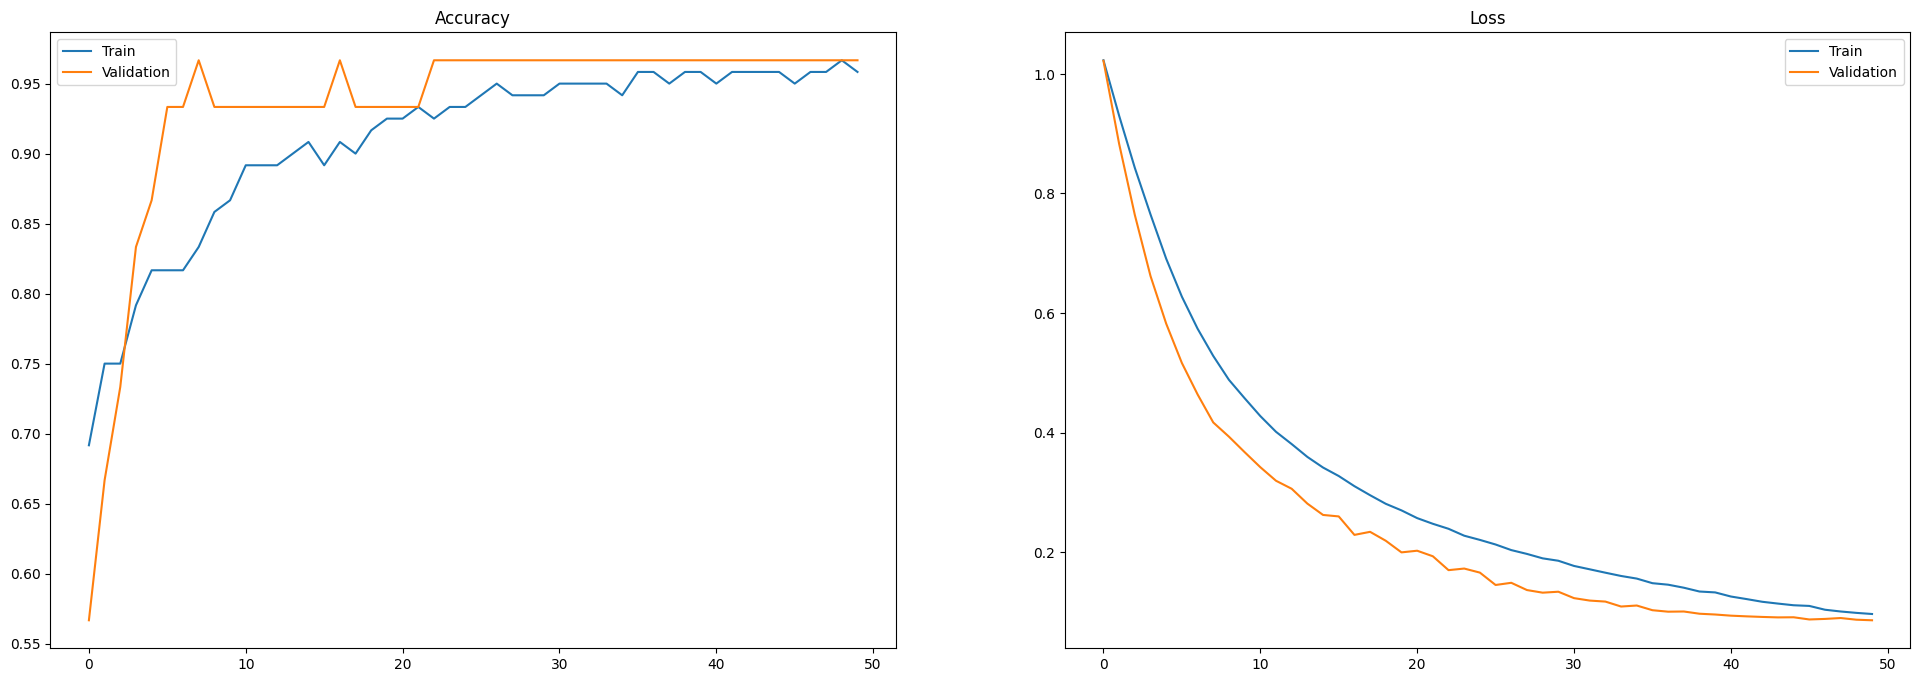

In [32]:
# Definir el modelo utilizando tf.keras.Sequential con una lista de capas
model = Sequential([
    InputLayer(input_shape=(4,)),  # Capa de entrada con 4 características
    Dense(10, activation='relu'),  # Primera capa oculta con 10 unidades y activación ReLU
    Dense(10, activation='relu'),  # Segunda capa oculta con 10 unidades y activación ReLU
    Dense(3, activation='softmax') # Capa de salida con 3 unidades y activación softmax
])

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Entrenamiento del modelo
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=5, validation_data=(X_test_scaled, y_test), verbose=0)

# Evaluación del modelo
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Precisión del modelo en el conjunto de prueba: {accuracy * 100:.2f}%")

# Realizar predicciones
predictions = model.predict(X_test_scaled)
predicted_classes = predictions.argmax(axis=1)

plot_history(history)

In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Realizar predicciones
predictions = model.predict(X_test_scaled)
predicted_classes = predictions.argmax(axis=1)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test.argmax(axis=1), predicted_classes)

# Mostrar la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

# Calcular métricas manualmente
true_positives = np.diag(conf_matrix)
precision = true_positives / np.sum(conf_matrix, axis=0)
recall = true_positives / np.sum(conf_matrix, axis=1)
accuracy = np.sum(true_positives) / np.sum(conf_matrix)
f1_scores = 2 * (precision * recall) / (precision + recall)

# Imprimir las métricas calculadas manualmente
print("\nMétricas calculadas manualmente:")
print(f"Precisión: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"F1-Score: {f1_scores}")

# Utilizar classification_report de SciKit-Learn para comparar
report = classification_report(y_test.argmax(axis=1), predicted_classes, target_names=label_encoder.classes_)

print("\nClassification Report de SciKit-Learn:")
print(report)


1/1 [==============================] - 0s 35ms/step
Matriz de Confusión:
[[10  0  0]
 [ 0  4  1]
 [ 0  0 15]]

Métricas calculadas manualmente:
Precisión: [1.     1.     0.9375]
Recall: [1.  0.8 1. ]
Accuracy: 0.9666666666666667
F1-Score: [1.         0.88888889 0.96774194]

Classification Report de SciKit-Learn:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.80      0.89         5
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.97        30
      macro avg       0.98      0.93      0.95        30
   weighted avg       0.97      0.97      0.97        30



In [6]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

from sklearn import preprocessing, model_selection, metrics

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras import optimizers

from matplotlib import pyplot as plt
import plotly.express as px

nombre_archivo = DATOS_DIR + 'Iris.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
# %% Carga de dataset con formato R, G, B, Color
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

# Para hacer una inspección rápida de los datos
#print(df.head())
#print(df.describe())
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [29]:
# grafica ejemplos según propiedades en 3d
px.scatter_3d(df, x="petallength", y="petalwidth", z="sepallength", size="sepalwidth",
              color="class")

Selección de atributos y target

In [8]:
# %% separa atributos y clases
X_raw = np.array(df.iloc[:, :4])
Y_raw = np.array(df['class'])
nomClases = df['class'].value_counts()

# Binarizador para convertir el nombre de la clase en one hot encoding
binarizer = preprocessing.LabelBinarizer()

# Binariza cada clase como una combinación de un 1 y 0s
Y_raw = binarizer.fit_transform(Y_raw)
print('Las clases del dataset son :', binarizer.classes_)

# %% Separa ejemplos para enternamiento y testeo
TEST_SIZE = 0.2 # proporcion entre testeo entre entrenamiento y testeo
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_raw, Y_raw, test_size=TEST_SIZE)#, random_state=42)

# Escala los atributos de los ejemplo
scaler = preprocessing.StandardScaler()
#scaler = preprocessing.MinMaxScaler()
X_train  = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


print('\nDatos de Entrenamiento: %d   Datos de Testeo: %d' % (len(Y_train), len(Y_test) ))


Las clases del dataset son : ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Datos de Entrenamiento: 120   Datos de Testeo: 30


**Definición de funciones para métricas**

In [9]:
# calcula las metricas precision, recall, f1-score y accuracy a partir de la matriz de confusion
# retorna tupla: ( precision, recall, f1_score, accuracy )
def calcular_metricas(conf_mat):
    precision = np.zeros(conf_mat.shape[0])
    for i in range(0, len(conf_mat)):
        precision[i] = conf_mat[i][i]/sum(conf_mat.T[i])

    recall = np.zeros(conf_mat.shape[0])
    for i in range(0, len(conf_mat)):
        recall[i] = conf_mat[i][i]/sum(conf_mat[i])

    f1_score = 2* (precision*recall) /(precision+recall)

    accuracy =  0
    for i in range(0, len(conf_mat)):
        accuracy+=conf_mat[i][i]
    accuracy/= conf_mat.sum()

    return ( precision, recall, f1_score, accuracy )

# el parámetro metricas es una tupla ( precision, recall, f1_score, accuracy )
def imprimir_metricas( metricas ):
    (precision, recall, f1_score, accuracy) = metricas
    print('\n clase   precision    recall    f1-score')
    for i in range(0, len(precision)):
        print('%5d %10.2f %10.2f %10.2f' % (i, precision[i], recall[i], f1_score[i]))
    print('\naccuracy: %6.2f\n' % accuracy)


**Entrenamiento**

In [30]:
ENTRADAS = X_train.shape[1]
OCULTAS = 2
SALIDAS  = Y_train.shape[1]
ACTIVACION = 'tanh'   # TF vs SkLearn linear => identity, sigmoid => logistic, tanh => tanh, relu => relu
EPOCAS = 100
TAM_LOTE = 32
ALFA = 0.05

print(X_train.shape)
print(X_test.shape)

modelo = Sequential()
modelo.add(Dense(OCULTAS, activation=ACTIVACION, input_dim=ENTRADAS))
modelo.add(Dense(OCULTAS, activation=ACTIVACION))
modelo.add(Dense(SALIDAS, activation='softmax'))

modelo.summary()

optimizador = optimizers.SGD(learning_rate=ALFA)
# obtiene la arquitectura para el modelo y lo compila
modelo.compile(optimizer=optimizador, loss='categorical_crossentropy', metrics = ['accuracy'])

# Entrena el modelo y guarda la historia del progreso
history = modelo.fit(x=X_train, y=Y_train, batch_size=TAM_LOTE, validation_split=0.25, epochs=EPOCAS, verbose=0)

(120, 4)
(30, 4)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 10        
                                                                 
 dense_7 (Dense)             (None, 2)                 6         
                                                                 
 dense_8 (Dense)             (None, 3)                 9         
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


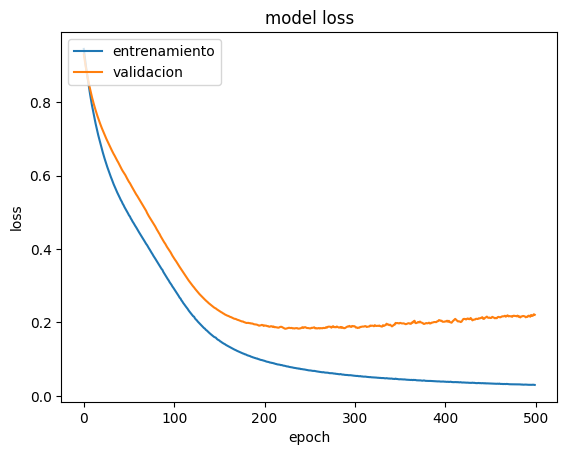

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['entrenamiento', 'validacion'], loc='upper left')
plt.show()

In [12]:
#  ########### Medición del entrenamiento ######################
Y_pred = modelo.predict(X_train)

# "invierte" la transformacion binaria para obtener los nombres de las clases
Y_it = binarizer.inverse_transform(Y_train)
Y_pred_it = binarizer.inverse_transform(Y_pred)

# calculo manual del accuracy
print('Efectividad: %6.2f%%' % (100*(Y_pred_it == Y_it).sum()/len(Y_it)) )

report = metrics.classification_report(Y_it, Y_pred_it)
print("Reporte SkLearn:\n%s" % report)
cm = metrics.confusion_matrix(Y_it, Y_pred_it)
print("Confusion matrix:\n%s" % cm)

#calcula métricas de forma manual
mt = calcular_metricas(cm)
imprimir_metricas(mt)

4/4 [==============================] - 0s 3ms/step
Efectividad:  97.50%
Reporte SkLearn:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        38
Iris-versicolor       1.00      0.93      0.96        40
 Iris-virginica       0.93      1.00      0.97        42

       accuracy                           0.97       120
      macro avg       0.98      0.97      0.98       120
   weighted avg       0.98      0.97      0.97       120

Confusion matrix:
[[38  0  0]
 [ 0 37  3]
 [ 0  0 42]]

 clase   precision    recall    f1-score
    0       1.00       1.00       1.00
    1       1.00       0.93       0.96
    2       0.93       1.00       0.97

accuracy:   0.97

